In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import numpy as np
import requests
from talib import MACD, RSI, BBANDS
from datetime import datetime, timedelta, date
from IPython.display import display, HTML
from liualgotrader.common import config
%matplotlib inline
import json
import math
from dateutil import parser
from pytz import timezone
import pytz
import sys
import iso8601
import asyncio
from pandas import DataFrame as df
from liualgotrader.analytics.analysis import (
    load_trades_by_batch_id,
    calc_batch_revenue,
    count_trades,
)
from liualgotrader.common.market_data import get_historical_data_from_poylgon_for_symbols
import nest_asyncio
nest_asyncio.apply()

In [2]:
batch_id = "1e0388c0-58c7-4450-945b-d815e13bc552"

In [3]:
api = tradeapi.REST(base_url="https://api.alpaca.markets")

In [4]:
trades = load_trades_by_batch_id(batch_id)

[91531]2020-10-25 17:36:57.108069:db connection pool initialized


In [5]:
day_to_analyze = min(trades['client_time'].tolist())
config.market_open = day_to_analyze.replace(hour=9, minute=30, second=0, microsecond=0)

In [6]:
how_was_my_batch = pd.DataFrame()
trades["client_time"] = pd.to_datetime(trades["client_time"])
how_was_my_batch["symbol"] = trades.symbol.unique()
how_was_my_batch["revenues"] = how_was_my_batch["symbol"].apply(
    lambda x: calc_batch_revenue(x, trades, batch_id)
)
how_was_my_batch["count"] = how_was_my_batch["symbol"].apply(
    lambda x: count_trades(x, trades, batch_id)
)

In [7]:
pd.set_option('display.max_rows', how_was_my_batch.shape[0]+1)
how_was_my_batch

symbol revenues  count
0       AA    15.05      8
1      ACB   -16.43      6
2     ADTN    -7.92      2
3     AKBA     7.65      2
4     ALDX    48.72      2
5      AMC    18.37      4
6     AMRS    -6.72      2
7     AMRX    -5.64      2
8     AMTX   -46.64     12
9      APT   -14.08      6
10    AQST    -3.79      4
11      AR   -10.84      4
12    ARAY    -9.12      2
13    ASMB    50.40      2
14    ATEC    -3.78      4
15    ATHA    -3.00      4
16     ATI    14.14      2
17    AVXL   -36.84     12
18    AVYA    -3.06      4
19    AXTI    -4.47      2
20    AZUL    -6.12      6
21    BBAR    -7.38      2
22    BEST    14.04      6
23    BGFV    -2.12      2
24     BKR     0.73      2
25     BMA    -4.26      2
26    BPMP    29.76      2
27     BPY    -4.44      4
28    CBAY    -8.19      6
29    CENX     4.97      6
30    CEQP    -4.02      2
31    CERS     4.44      2
32     CGC   -12.27      6
33    CHEF    -4.80      2
34    CLDX     8.82      4
35     CLF    -8.86      6
36    CMRX    19.92      2
37     CNK   -20.45      8
38    CNTG   -16.78      8
39     CRK    20.40      2
40    CRON    -8.85      4
41    CRSR    11.23      4
42      CS    -0.97      6
43    CSPR   -10.80      2
44    CSTM     0.04      6
45    CTIC   -17.59      8
46     CUK     2.40      2
47    CVGI   -11.62      2
48    CYCC    -5.02      6
49     DAC    30.90      2
50     DDD   -16.83     10
51    DENN     3.84      4
52    DLTH    -4.72      2
53    EIGI    24.30      2
54    ENDP   -14.95      8
55    ERIC     0.01     10
56     ERJ     2.12      6
57    ESGC   -49.51     14
58    ETON    -6.10      2
59    EVGN    17.71      2
60     FCX     1.68      2
61    FINV    -9.38      2
62    FLDM    -5.48      2
63    FLEX    -2.71      8
64     FLR    -2.61      2
65     FTI    -2.79      4
66    FUBO    28.87      8
67    GGAL    -5.64      2
68    GIII     8.97      2
69    GILT    -1.82      2
70    GMBL    40.71      2
71     GME    15.12     10
72    GOGO   -13.85     10
73     GOL   -13.80     10
74    GOVX    -6.20      2
75    GPRE    -9.46      4
76    GRBK    -3.06      2
77    GRWG    -8.18      6
78      HA   -12.76     10
79     HAL    28.89      6
80     HBM    16.68      6
81    HMHC   -23.67      6
82      HX    -9.11      6
83     IBN     3.48      4
84     IEA    21.66      2
85    IFRX    -3.82      2
86    IMAX    -5.14      4
87    INFN     0.00      2
88     IPI   -18.13      4
89    ITUB    -2.36      2
90      JG   -30.00      2
91    KALA    -9.52      2
92    KODK    -7.49      4
93    KTOV    -6.75      2
94     LAC    -3.04      6
95    LAZY    40.28      2
96    LBRT    -5.08      4
97    LGHL    93.80      2
98    LIND    -6.09      4
99    LLNW   -12.88      6
100   MARA   -30.21      6
101   MAXN   -23.65      6
102    MCS    -7.82      4
103   MDGS    -8.54      2
104   MESO     6.80      4
105    MFH   -27.08      4
106    MGI   -35.79     10
107   MGNI    15.21     10
108   MRAM    -6.70      2
109    MRC    -4.18      2
110   MVIS   -28.55     10
111    MXC   -26.81      6
112   NBEV    27.98      6
113   NCMI   -12.91      4
114    NEX    14.85      4
115   NNDM    16.92      4
116    NOK     2.34      4
117    NOV    -5.54      6
118    ODT    -6.38      2
119    OII    -7.59      6
120    OLN     8.80      4
121    ONB     2.65      6
122   ONCY   -14.70      2
123    OPK   -15.73     10
124   OPTT    24.78      2
125   ORBC    20.72      2
126    OVV     1.03      2
127   PACW    18.96      4
128    PBI   -14.03     10
129  PBR.A    -2.80      2
130   PDCE     9.62      2
131   PEIX    -7.55      6
132   PLAY   -16.28     12
133    PLT    -0.19     10
134   PRPH    42.47      2
135   QNST    -1.77      2
136   RDHL    -1.90      2
137   RENN   -38.28      8
138   RIOT   -14.82      4
139   RUTH    -1.70      2
140   SAVE     4.72      2
141    SBE   -14.82      8
142    SBS     2.42      2
143   SGLB    -0.96      4
144   SIEN    -4.62      2
145    SKT    -6.46      8
146    SOL   -15.08      6
147   SO

In [8]:
print(f"Revenue: ${round(sum(how_was_my_batch['revenues'].tolist()), 2)}")

Revenue: $-235.35


In [9]:

minute_history = get_historical_data_from_poylgon_for_symbols(
    api,
    trades.symbol.unique().tolist(),
    day_to_analyze - timedelta(days=7),
    day_to_analyze + timedelta(days=1),
)

AA analysis with profit 15.05


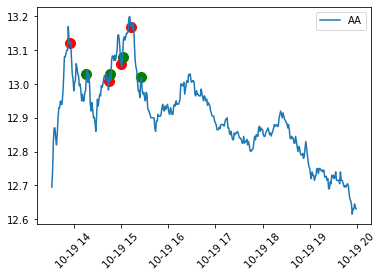

ACB analysis with profit -16.43


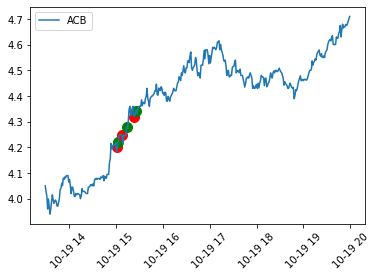

ADTN analysis with profit -7.92


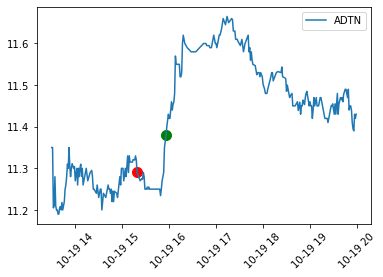

AKBA analysis with profit 7.65


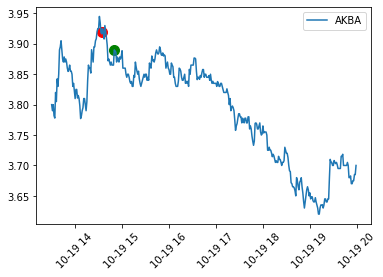

ALDX analysis with profit 48.72


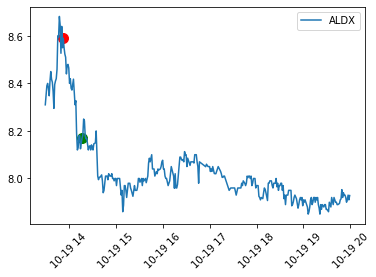

AMC analysis with profit 18.37


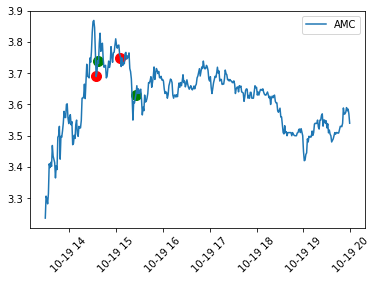

AMRS analysis with profit -6.72


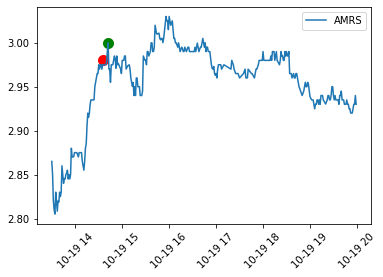

AMRX analysis with profit -5.64


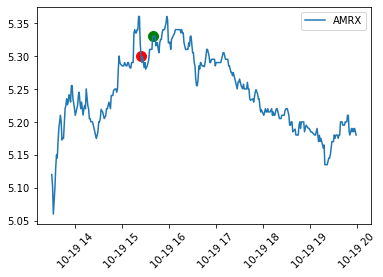

AMTX analysis with profit -46.64


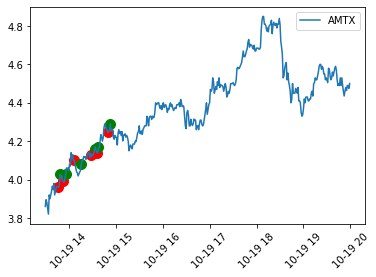

APT analysis with profit -14.08


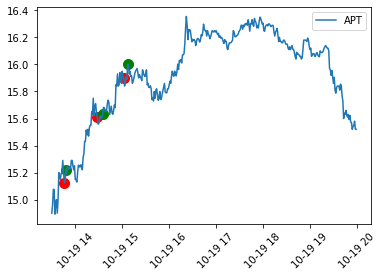

AQST analysis with profit -3.79


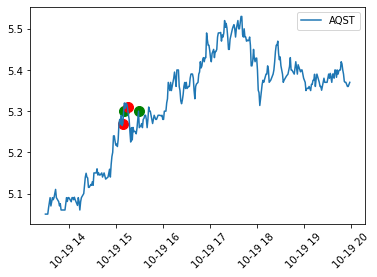

AR analysis with profit -10.84


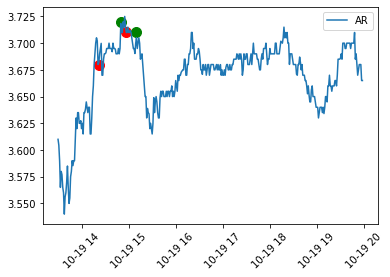

ARAY analysis with profit -9.12


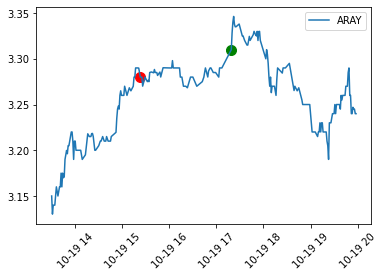

ASMB analysis with profit 50.40


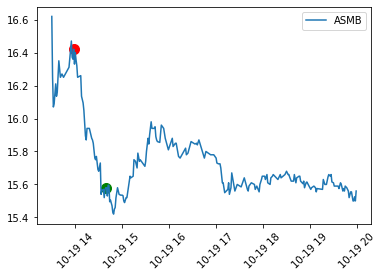

ATEC analysis with profit -3.78


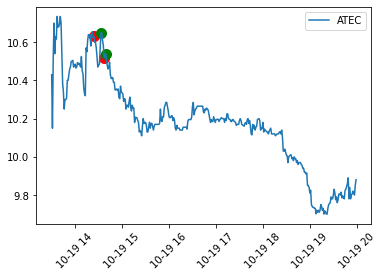

ATHA analysis with profit -3.00


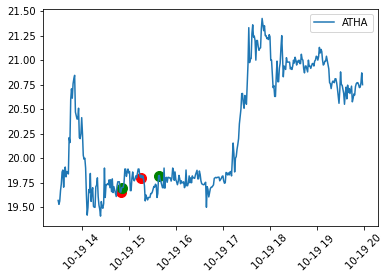

ATI analysis with profit 14.14


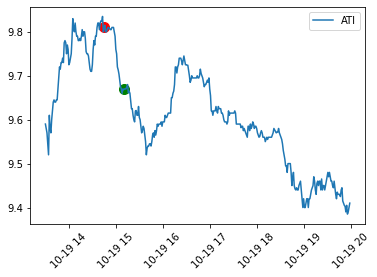

AVXL analysis with profit -36.84


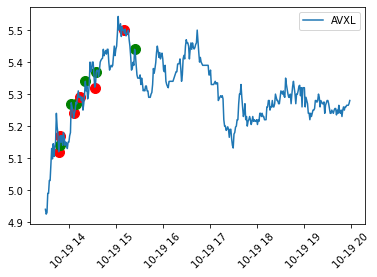

AVYA analysis with profit -3.06


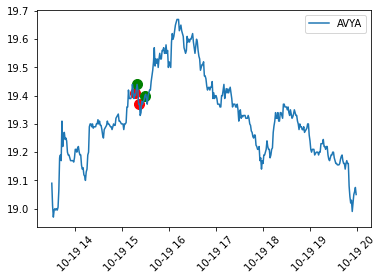

AXTI analysis with profit -4.47


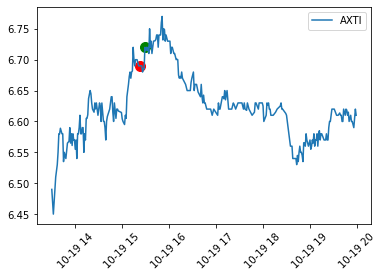

AZUL analysis with profit -6.12


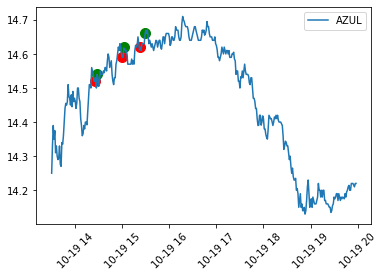

BBAR analysis with profit -7.38


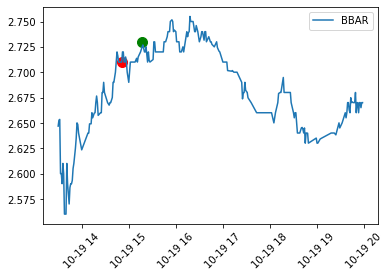

BEST analysis with profit 14.04


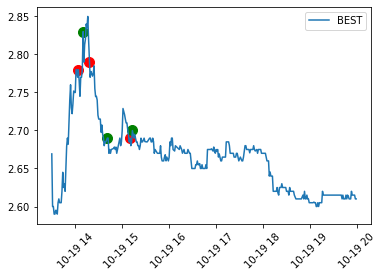

BGFV analysis with profit -2.12


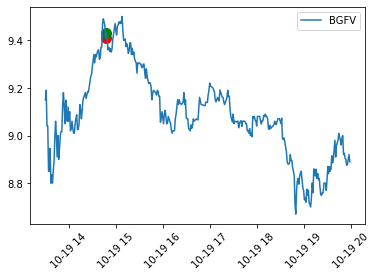

BKR analysis with profit 0.73


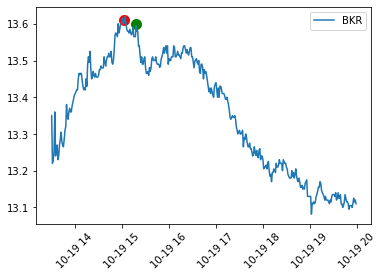

BMA analysis with profit -4.26


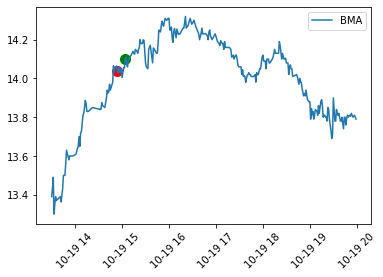

BPMP analysis with profit 29.76


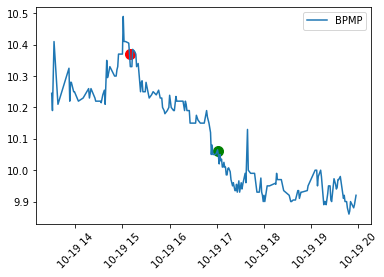

BPY analysis with profit -4.44


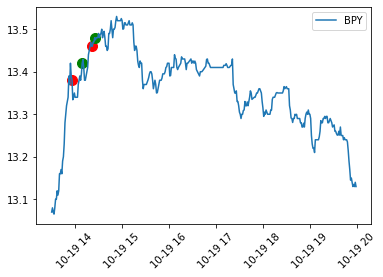

CBAY analysis with profit -8.19


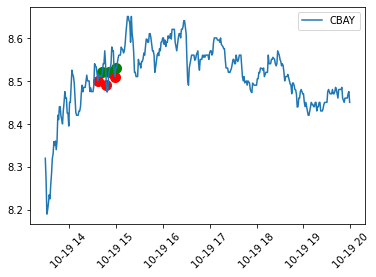

CENX analysis with profit 4.97


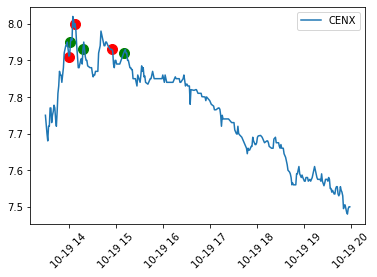

CEQP analysis with profit -4.02


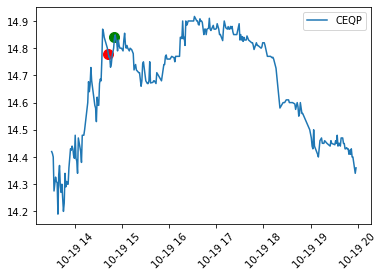

CERS analysis with profit 4.44


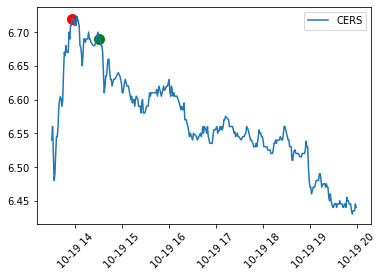

CGC analysis with profit -12.27


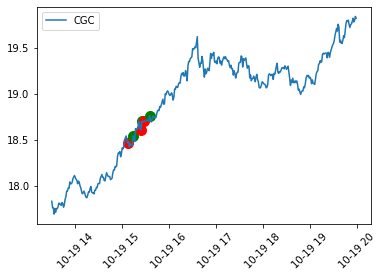

CHEF analysis with profit -4.80


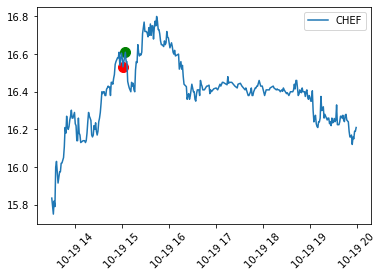

CLDX analysis with profit 8.82


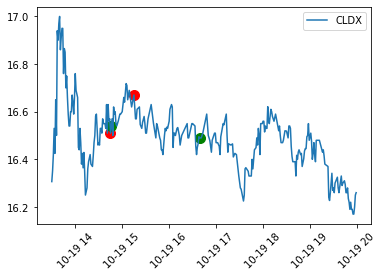

CLF analysis with profit -8.86


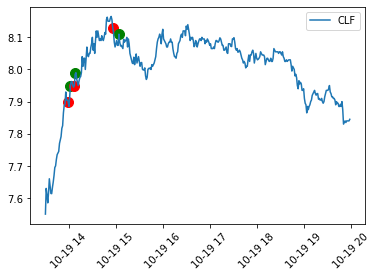

CMRX analysis with profit 19.92


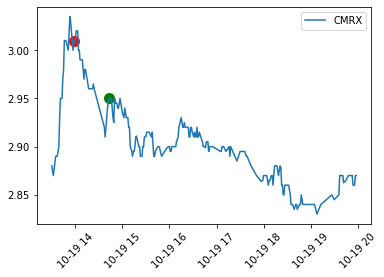

CNK analysis with profit -20.45


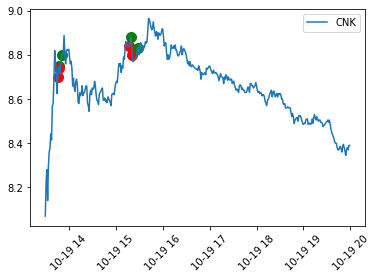

CNTG analysis with profit -16.78


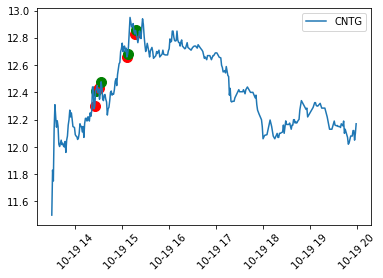

CRK analysis with profit 20.40


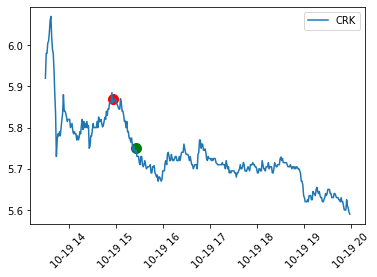

CRON analysis with profit -8.85


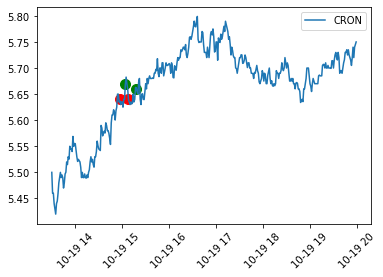

CRSR analysis with profit 11.23


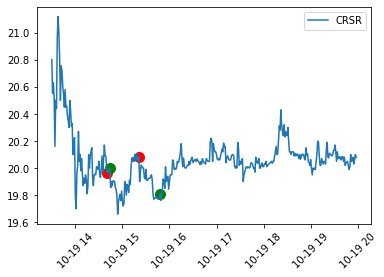

CS analysis with profit -0.97


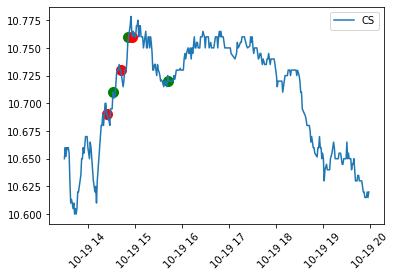

CSPR analysis with profit -10.80


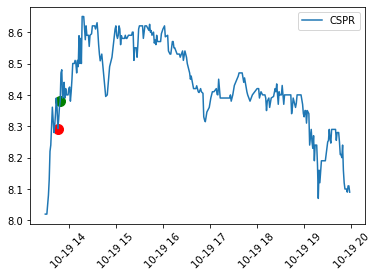

CSTM analysis with profit 0.04


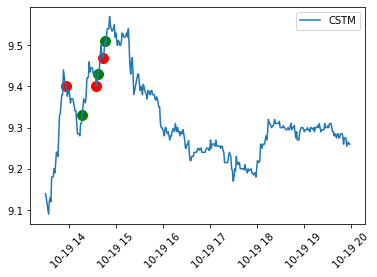

CTIC analysis with profit -17.59


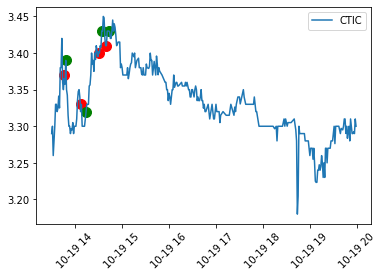

CUK analysis with profit 2.40


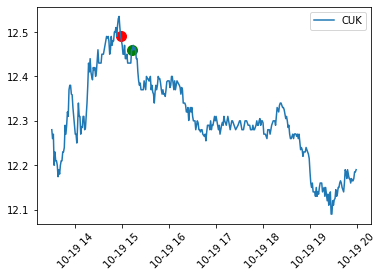

CVGI analysis with profit -11.62


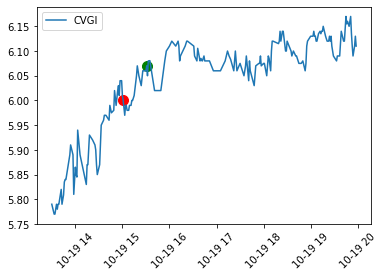

CYCC analysis with profit -5.02


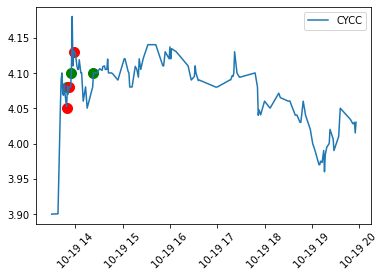

DAC analysis with profit 30.90


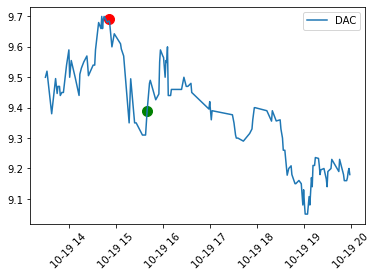

DDD analysis with profit -16.83


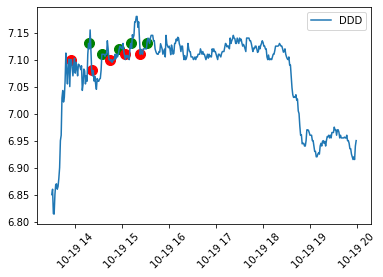

DENN analysis with profit 3.84


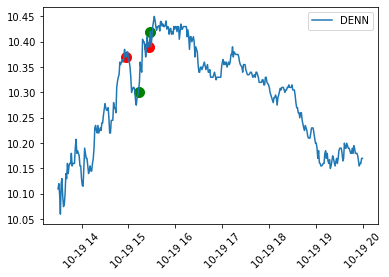

DLTH analysis with profit -4.72


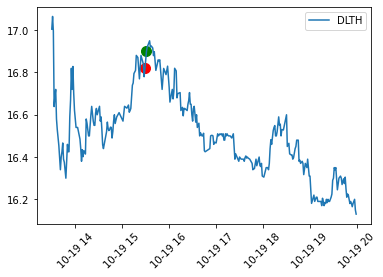

EIGI analysis with profit 24.30


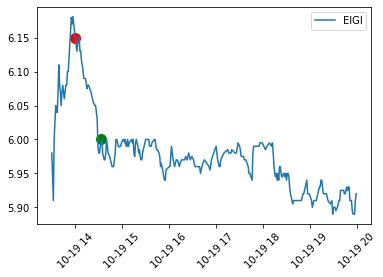

ENDP analysis with profit -14.95


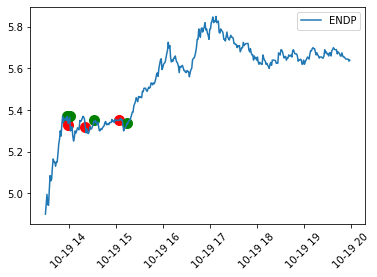

ERIC analysis with profit 0.01


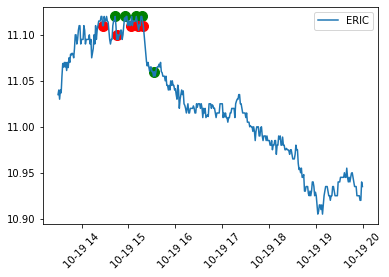

ERJ analysis with profit 2.12


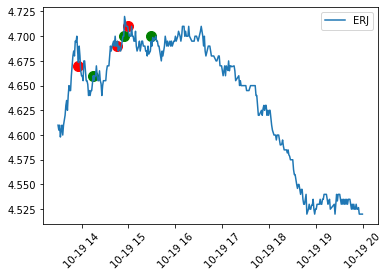

ESGC analysis with profit -49.51


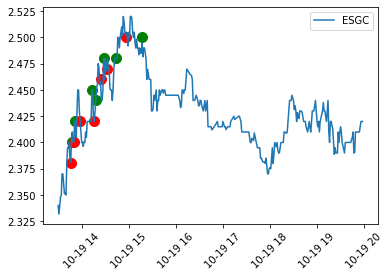

ETON analysis with profit -6.10


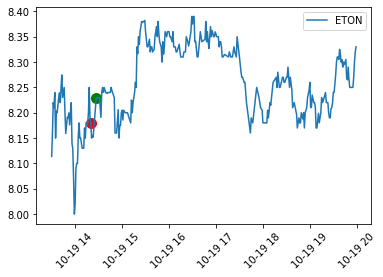

EVGN analysis with profit 17.71


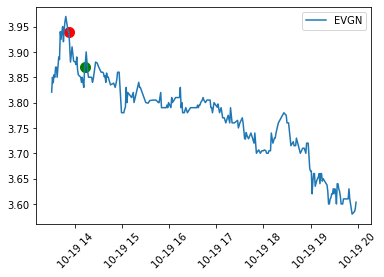

FCX analysis with profit 1.68


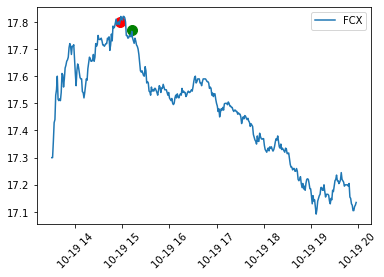

FINV analysis with profit -9.38


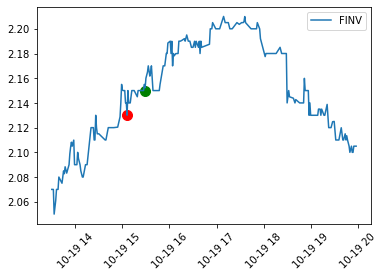

FLDM analysis with profit -5.48


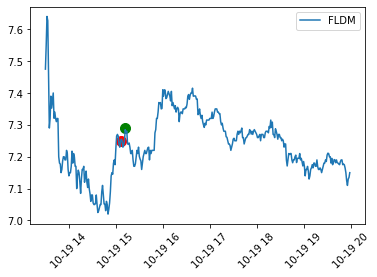

FLEX analysis with profit -2.71


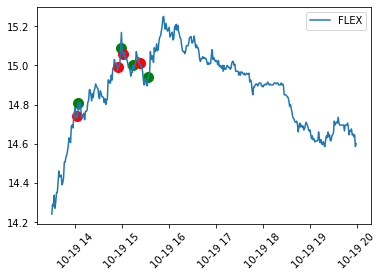

FLR analysis with profit -2.61


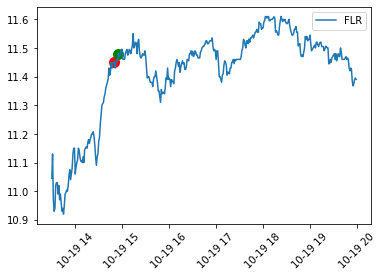

FTI analysis with profit -2.79


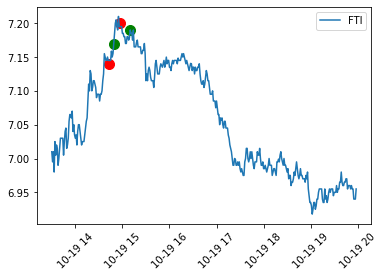

FUBO analysis with profit 28.87


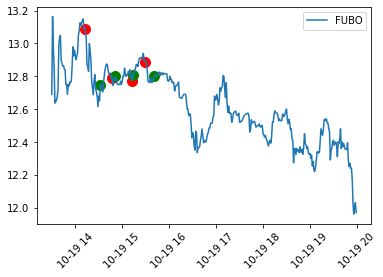

GGAL analysis with profit -5.64


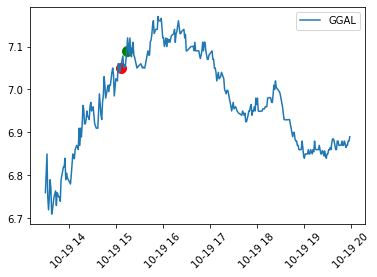

GIII analysis with profit 8.97


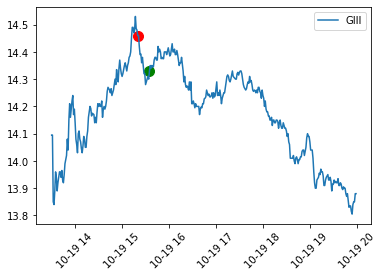

GILT analysis with profit -1.82


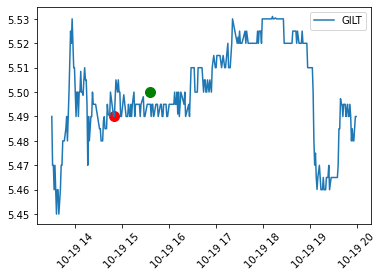

GMBL analysis with profit 40.71


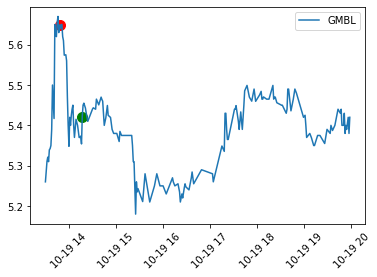

GME analysis with profit 15.12


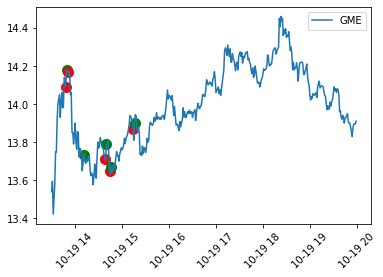

GOGO analysis with profit -13.85


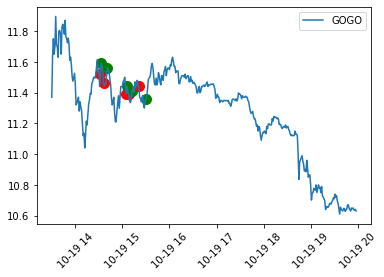

GOL analysis with profit -13.80


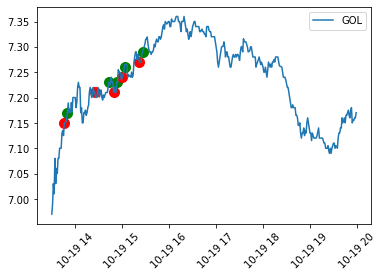

GOVX analysis with profit -6.20


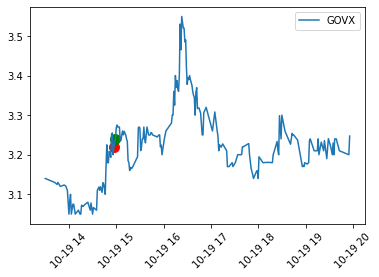

GPRE analysis with profit -9.46


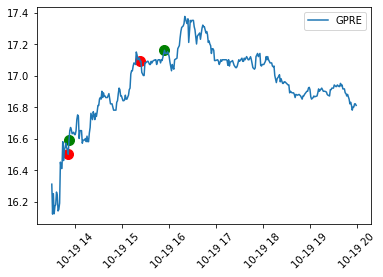

GRBK analysis with profit -3.06


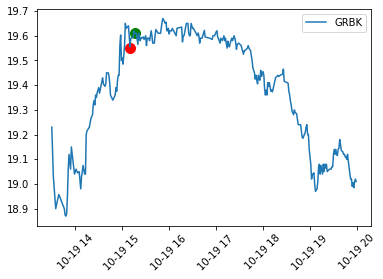

GRWG analysis with profit -8.18


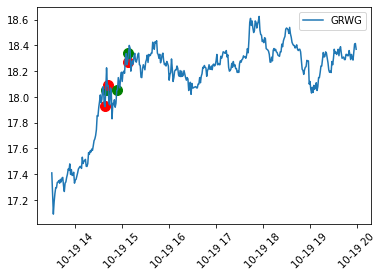

HA analysis with profit -12.76


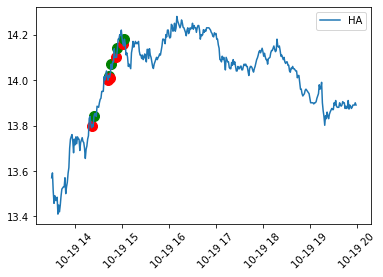

HAL analysis with profit 28.89


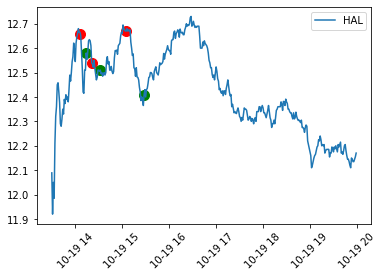

HBM analysis with profit 16.68


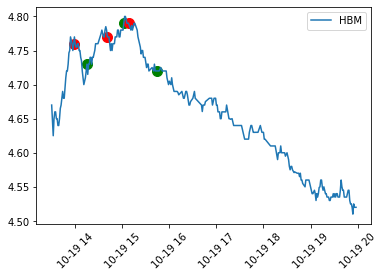

HMHC analysis with profit -23.67


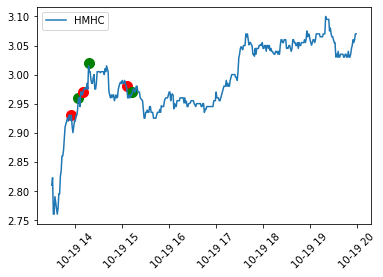

HX analysis with profit -9.11


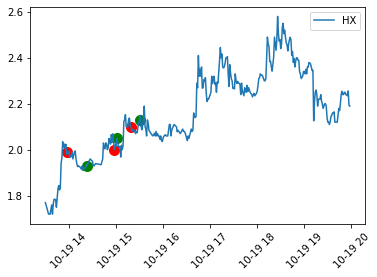

IBN analysis with profit 3.48


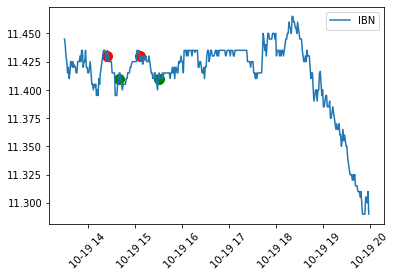

IEA analysis with profit 21.66


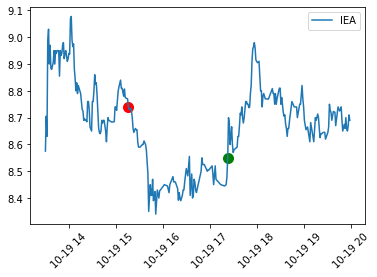

IFRX analysis with profit -3.82


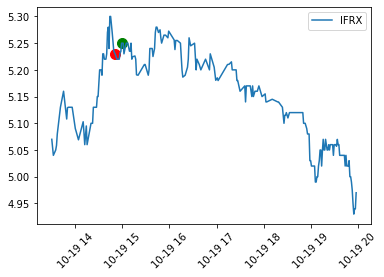

IMAX analysis with profit -5.14


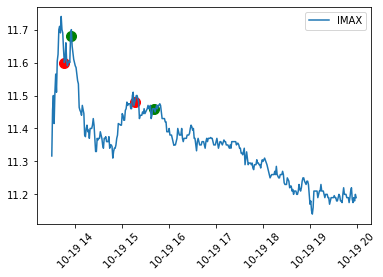

INFN analysis with profit 0.00


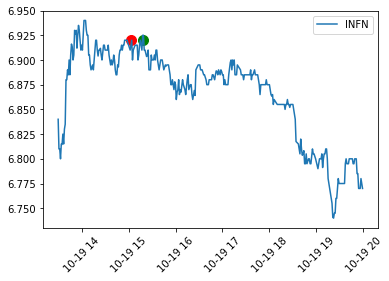

IPI analysis with profit -18.13


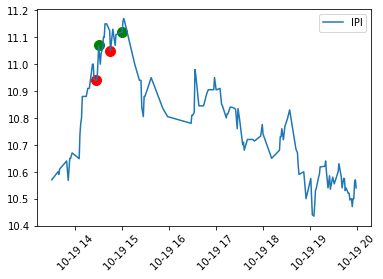

ITUB analysis with profit -2.36


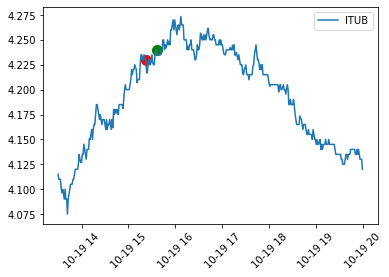

JG analysis with profit -30.00


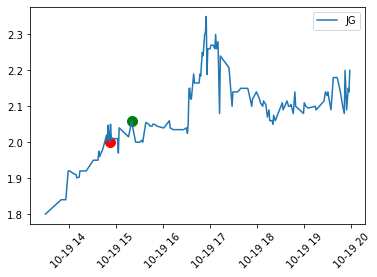

KALA analysis with profit -9.52


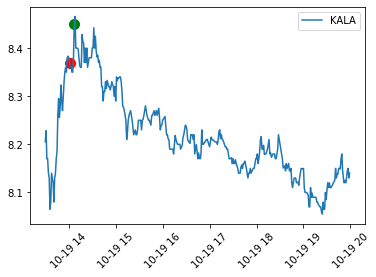

KODK analysis with profit -7.49


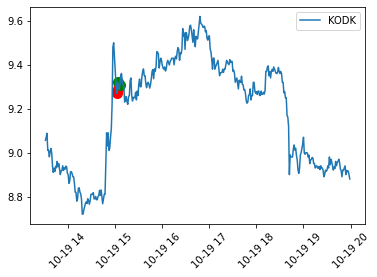

KTOV analysis with profit -6.75


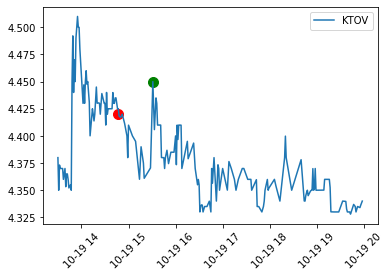

LAC analysis with profit -3.04


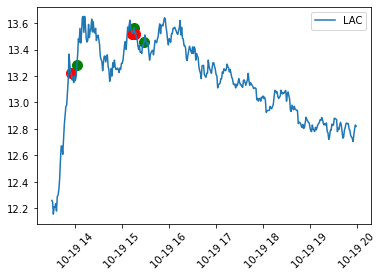

LAZY analysis with profit 40.28


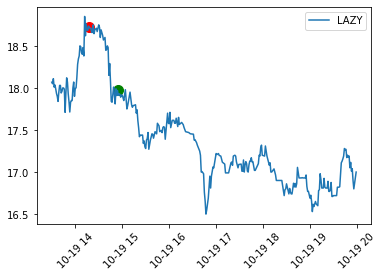

LBRT analysis with profit -5.08


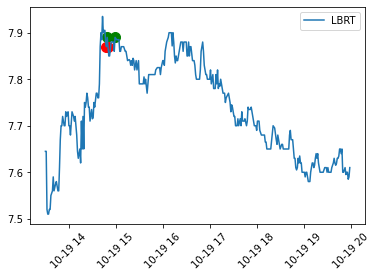

LGHL analysis with profit 93.80


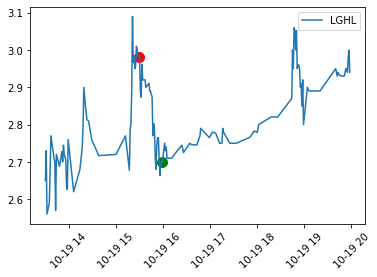

LIND analysis with profit -6.09


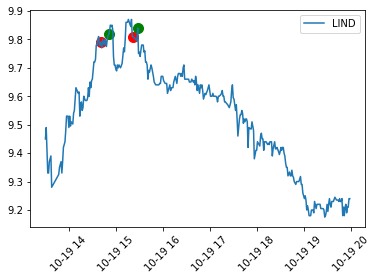

LLNW analysis with profit -12.88


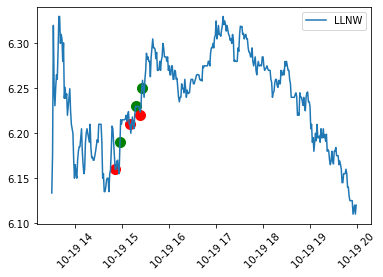

MARA analysis with profit -30.21


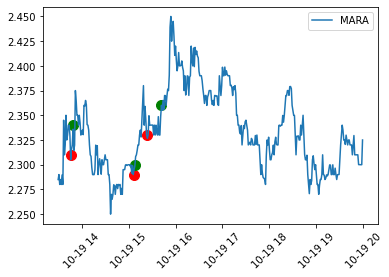

MAXN analysis with profit -23.65


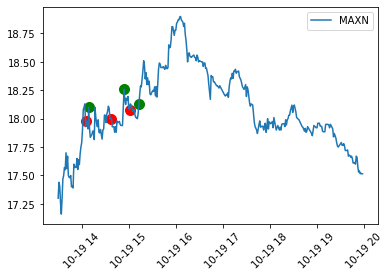

MCS analysis with profit -7.82


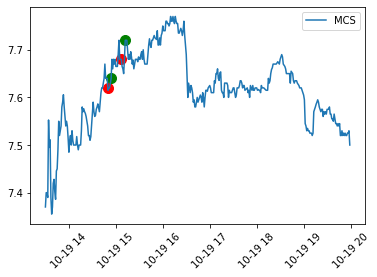

MDGS analysis with profit -8.54


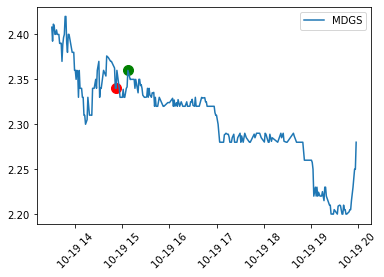

MESO analysis with profit 6.80


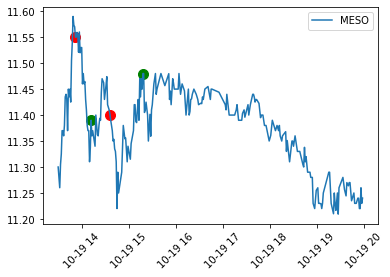

MFH analysis with profit -27.08


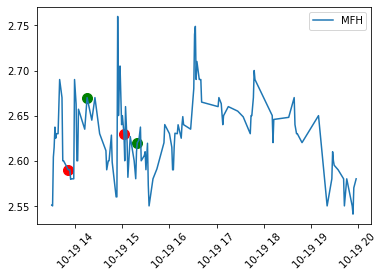

MGI analysis with profit -35.79


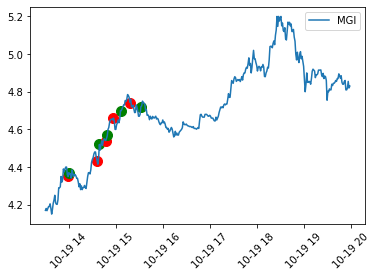

MGNI analysis with profit 15.21


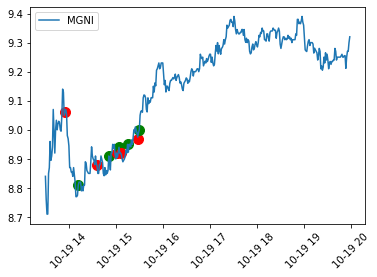

MRAM analysis with profit -6.70


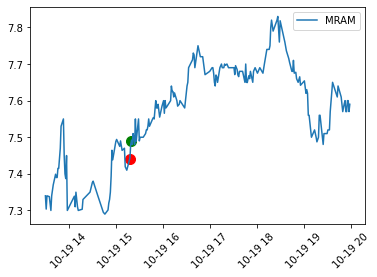

MRC analysis with profit -4.18


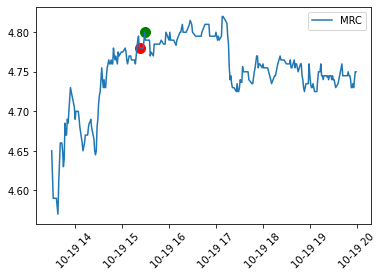

MVIS analysis with profit -28.55


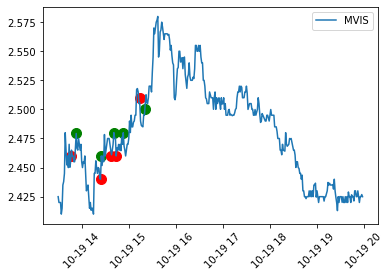

MXC analysis with profit -26.81


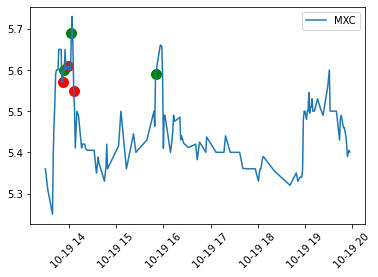

NBEV analysis with profit 27.98


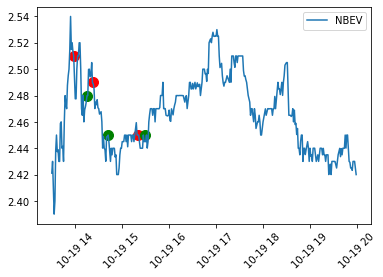

NCMI analysis with profit -12.91


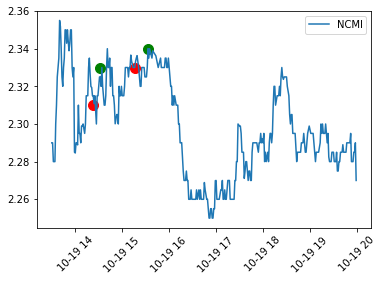

NEX analysis with profit 14.85


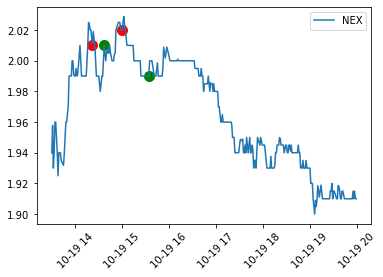

NNDM analysis with profit 16.92


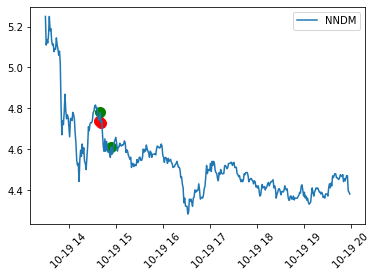

NOK analysis with profit 2.34


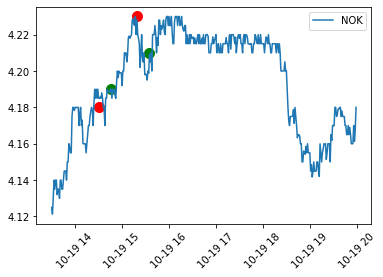

NOV analysis with profit -5.54


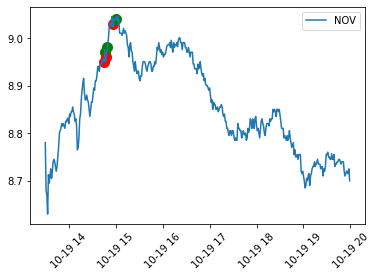

ODT analysis with profit -6.38


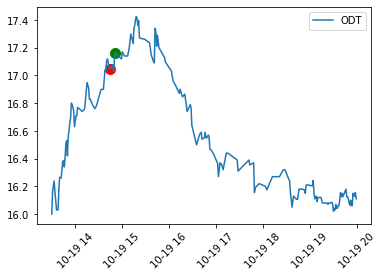

OII analysis with profit -7.59


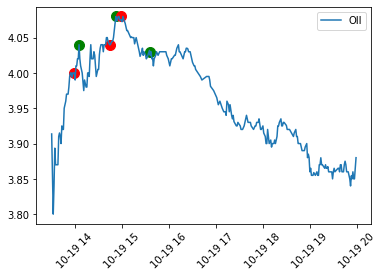

OLN analysis with profit 8.80


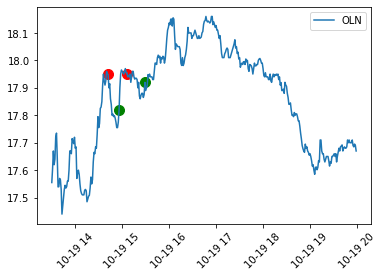

ONB analysis with profit 2.65


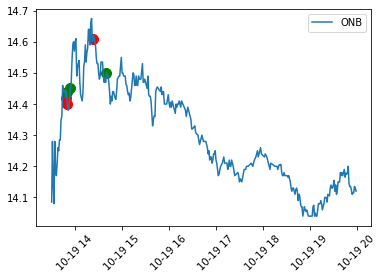

ONCY analysis with profit -14.70


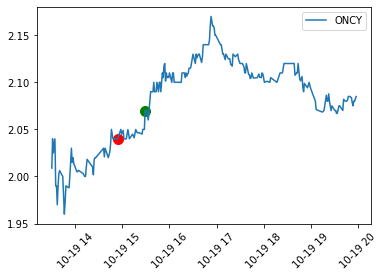

OPK analysis with profit -15.73


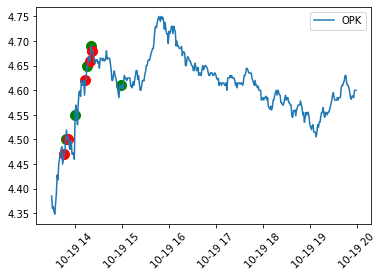

OPTT analysis with profit 24.78


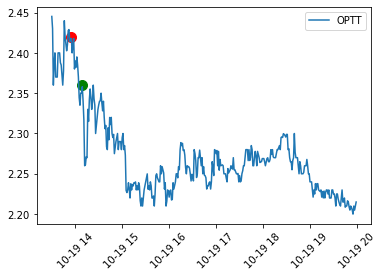

ORBC analysis with profit 20.72


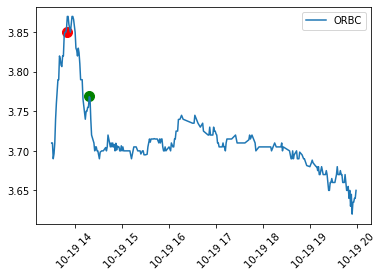

OVV analysis with profit 1.03


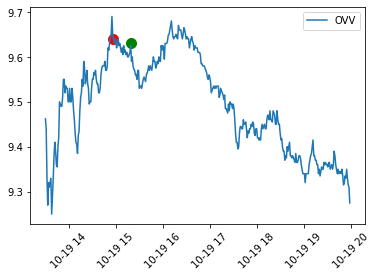

PACW analysis with profit 18.96


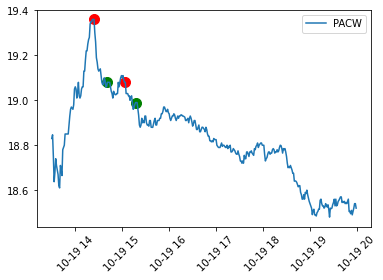

PBI analysis with profit -14.03


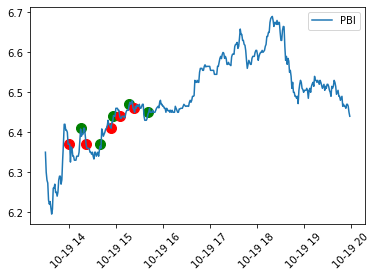

PBR.A analysis with profit -2.80


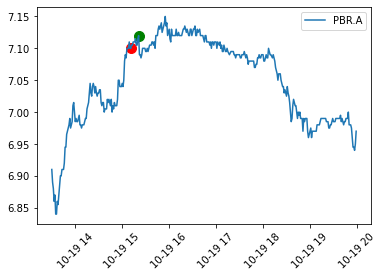

PDCE analysis with profit 9.62


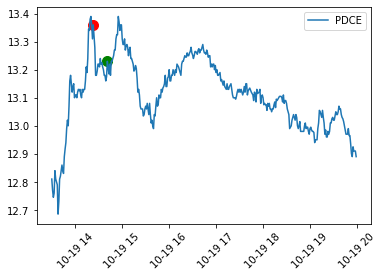

PEIX analysis with profit -7.55


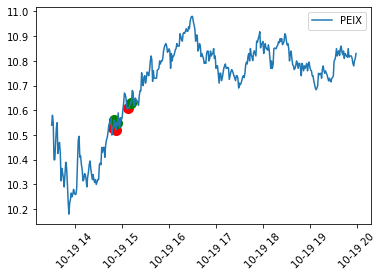

PLAY analysis with profit -16.28


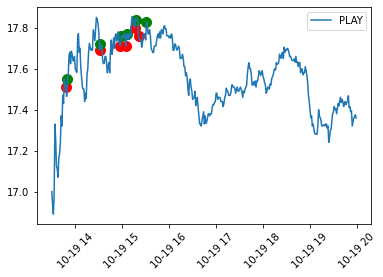

PLT analysis with profit -0.19


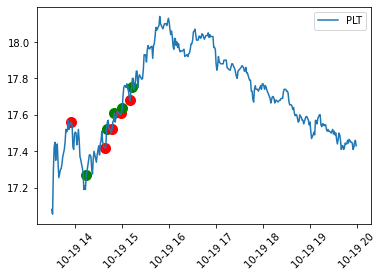

PRPH analysis with profit 42.47


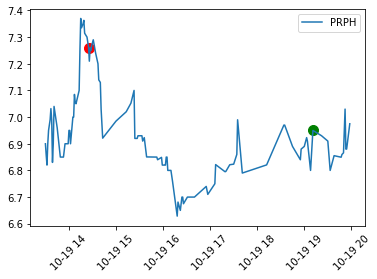

QNST analysis with profit -1.77


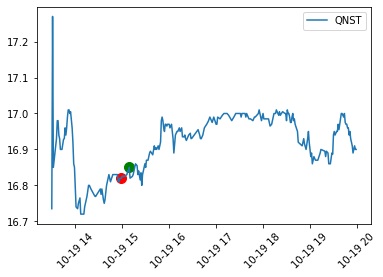

RDHL analysis with profit -1.90


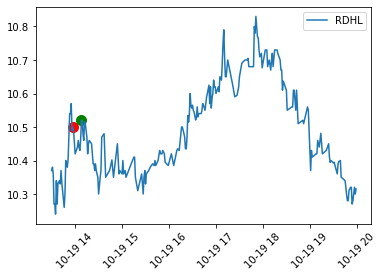

RENN analysis with profit -38.28


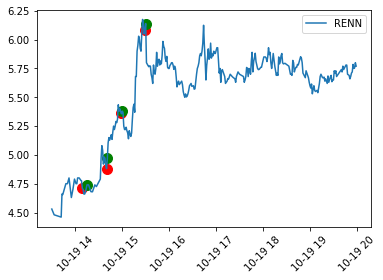

RIOT analysis with profit -14.82


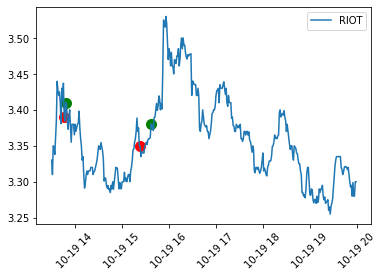

RUTH analysis with profit -1.70


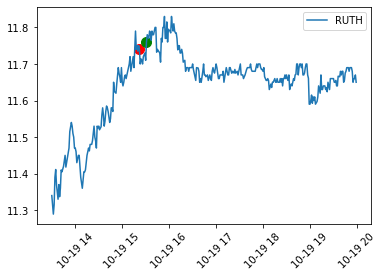

SAVE analysis with profit 4.72


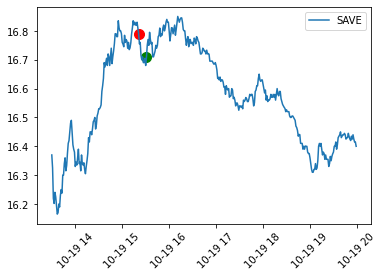

SBE analysis with profit -14.82


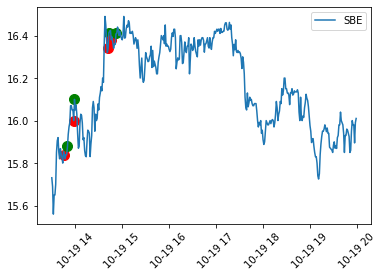

SBS analysis with profit 2.42


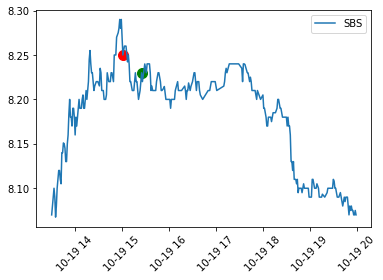

SGLB analysis with profit -0.96


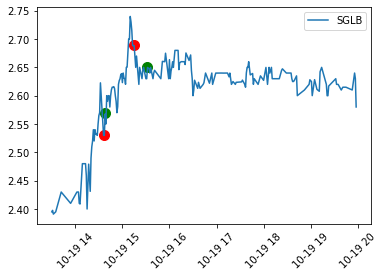

SIEN analysis with profit -4.62


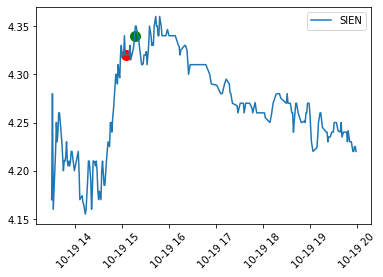

SKT analysis with profit -6.46


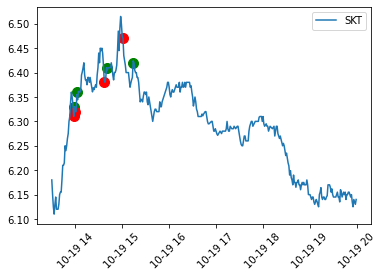

SOL analysis with profit -15.08


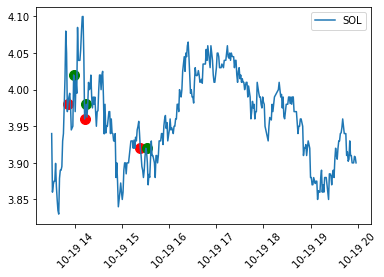

SOLO analysis with profit 0.00


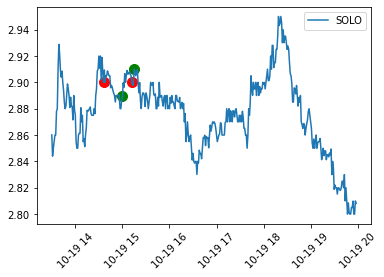

SOLY analysis with profit -10.99


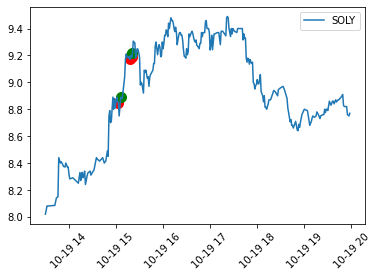

SOS analysis with profit -17.44


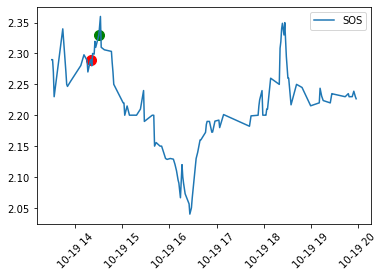

SPWR analysis with profit -10.70


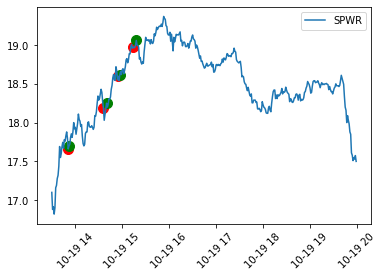

STRL analysis with profit 6.72


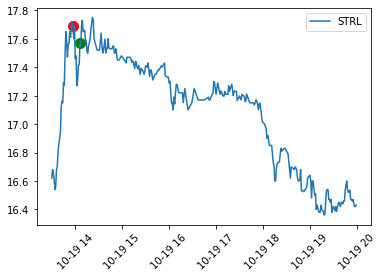

SVC analysis with profit 6.15


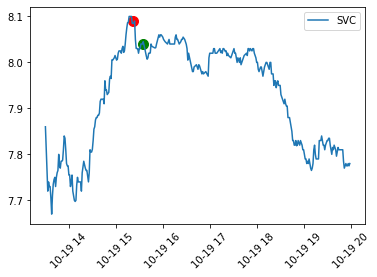

SWBI analysis with profit 2.85


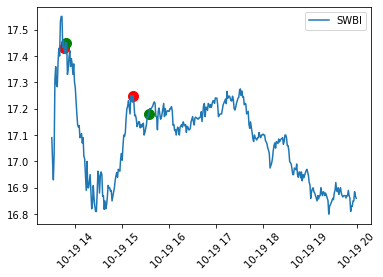

TECK analysis with profit 10.62


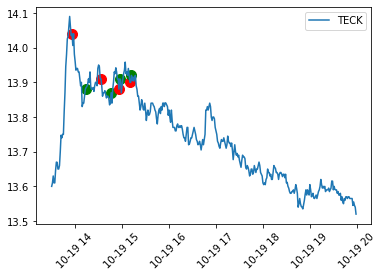

TEDU analysis with profit -14.76


In [ ]:
for symbol in minute_history:
    symbol_df = trades.loc[trades["symbol"] == symbol]
    start_date = symbol_df["client_time"].min()
    start_date = start_date.replace(hour=9, minute=30)
    end_date = start_date.replace(hour=16, minute=0)
    cool_down_date = start_date + timedelta(minutes=5)
    minute_history_index = minute_history[symbol]["close"].index.get_loc(
        start_date, method="nearest"
    )
    end_index = minute_history[symbol]["close"].index.get_loc(
        end_date, method="nearest"
    )
    cool_minute_history_index = minute_history[symbol]["close"].index.get_loc(
        cool_down_date, method="nearest"
    )
    open_price = minute_history[symbol]["close"][cool_minute_history_index]
    plt.plot(
        minute_history[symbol]["close"][minute_history_index:end_index].between_time(
            "9:30", "16:00"
        ),
        label=symbol,
    )
    plt.xticks(rotation=45)

    delta = 0
    profit = 0

    operations = []
    deltas = []
    profits = []
    times = []
    prices = []
    qtys = []
    indicators = []
    target_price = []
    stop_price = []
    daily_change = []
    precent_vwap = []
    patterns = []
    for index, row in symbol_df.iterrows():
        if (
            row["operation"] == "buy"
            and row["qty"] > 0
            or row["operation"] == "sell"
            and row["qty"] < 0
        ):
            try:
                now = int(row["client_time"])
                continue
            except Exception:
                pass

        delta = (
            row["price"]
            * row["qty"]
            * (1 if row["operation"] == "sell" and row["qty"] > 0 else -1)
        )
        profit += delta
        plt.scatter(
            row["client_time"].to_pydatetime(),
            row["price"],
            c="g" if row["operation"] == "buy" else "r",
            s=100,
        )
        deltas.append(round(delta, 2))
        profits.append(round(profit, 2))
        operations.append(row["operation"])
        times.append(pd.to_datetime(row["client_time"]))
        prices.append(row["price"])
        qtys.append(row["qty"])
        indicator = json.loads(row.indicators)
        indicators.append(indicator)
        target_price.append(row["target_price"])
        stop_price.append(row["stop_price"])
        daily_change.append(
            f"{round(100.0 * (float(row['price']) - open_price) / open_price, 2)}%"
        )
        precent_vwap.append(
            f"{round(100.0 * (indicator['buy']['avg'] - open_price) / open_price, 2)}%"
            if 'buy' in indicator and indicator['buy'] and "avg" in indicator['buy']
            else ""
        )

    d = {
        "profit": profits,
        "trade": deltas,
        "operation": operations,
        "at": times,
        "price": prices,
        "qty": qtys,
        "daily change": daily_change,
        "vwap": precent_vwap,
        "indicators": indicators,
        "target price": target_price,
        "stop price": stop_price,
    }
    print(f"{symbol} analysis with profit {round(profit, 2)}")
    display(HTML(pd.DataFrame(data=d).to_html()))
    plt.legend()
    plt.show()